In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [201]:
df = pd.read_csv("D:/kulyah/bigdata/fp/dataset/heart.csv")

In [202]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [203]:
df.shape

(918, 12)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [205]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [206]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [207]:
le = LabelEncoder()
df_new = df.copy(deep = True)

df_new['Sex'] = le.fit_transform(df_new['Sex'])
df_new['ChestPainType'] = le.fit_transform(df_new['ChestPainType'])
df_new['RestingECG'] = le.fit_transform(df_new['RestingECG'])
df_new['ExerciseAngina'] = le.fit_transform(df_new['ExerciseAngina'])
df_new['ST_Slope'] = le.fit_transform(df_new['ST_Slope'])

In [208]:
df_new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## Data Visualization

In [209]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


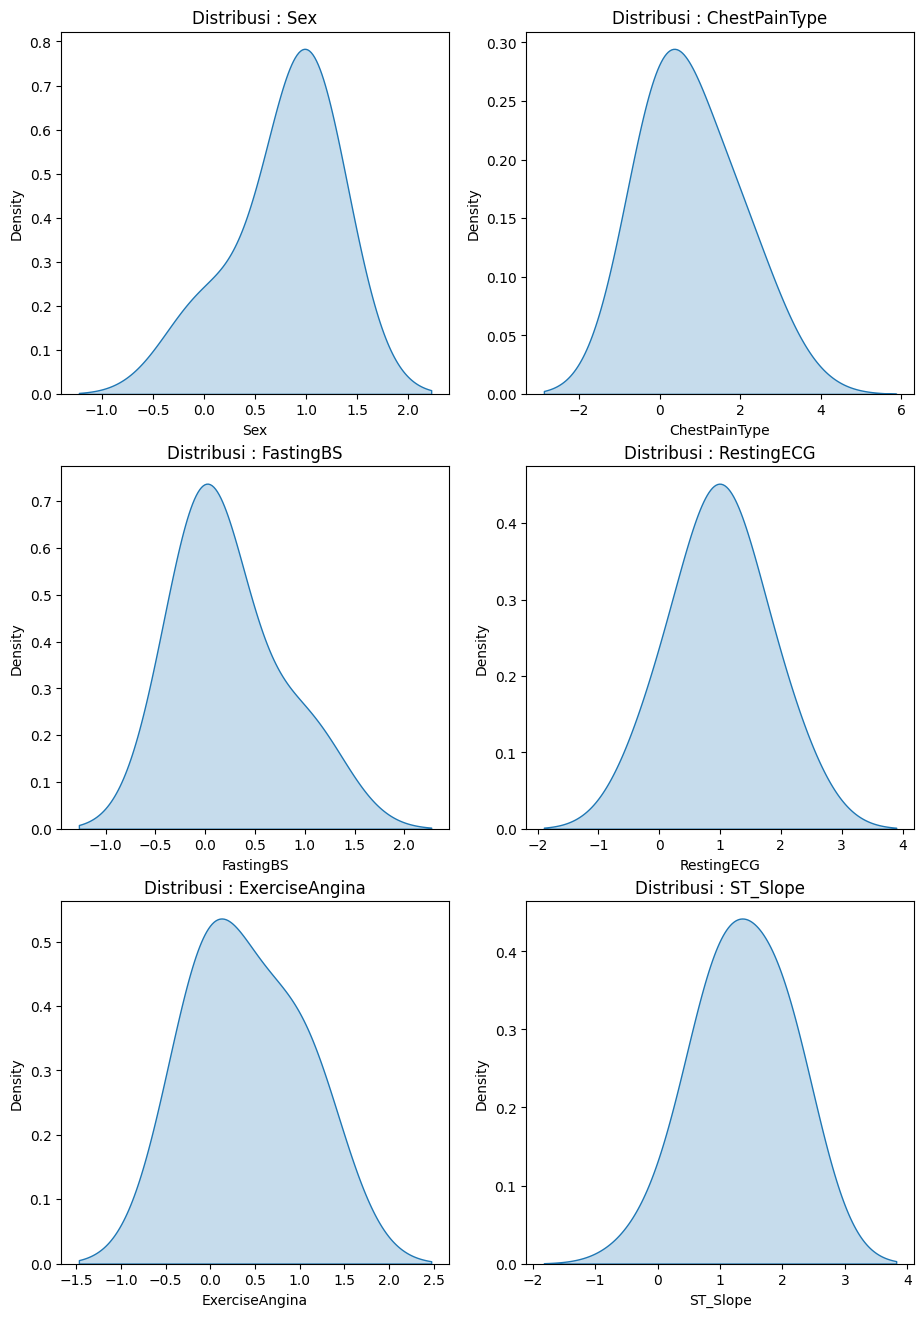

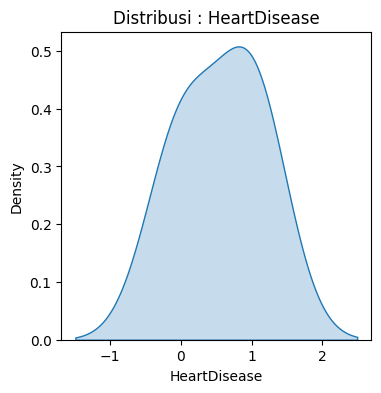

In [210]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (11,16))
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(df_new[categorical_features[i]], bw_method=1, fill=True)
    title = 'Distribusi : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4,4))
sns.kdeplot(df_new[categorical_features[len(categorical_features) - 1]],bw_method=1, fill=True)
title = 'Distribusi : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);


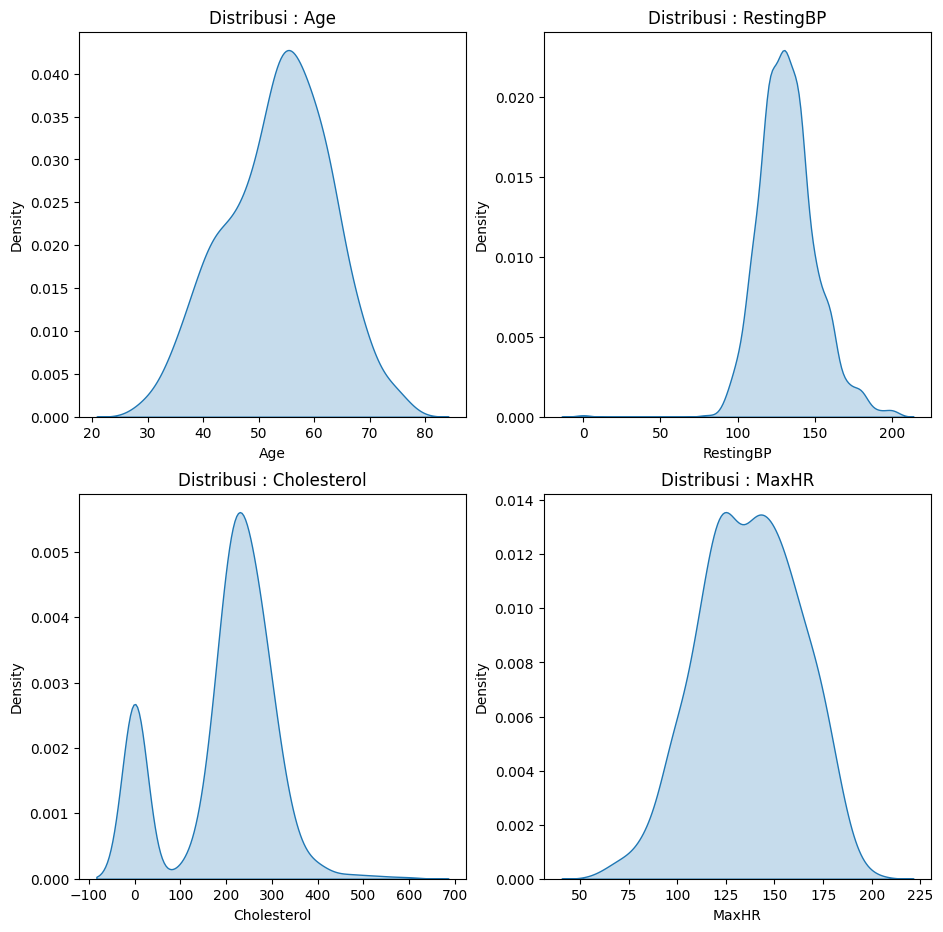

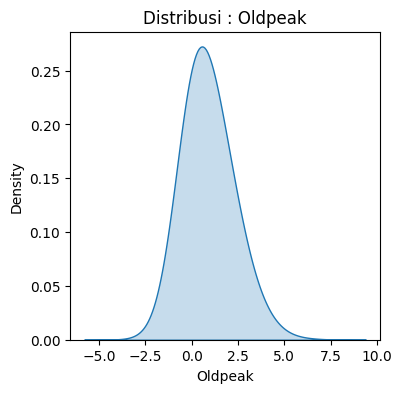

In [211]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (11,11))
for i in range(len(numerical_features) - 1):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(df_new[numerical_features[i]], fill=True)
    title = 'Distribusi : ' + numerical_features[i]
    plt.title(title)

plt.figure(figsize = (4,4))
sns.kdeplot(df_new[numerical_features[len(numerical_features) - 1]],bw_method=1, fill=True)
title = 'Distribusi : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

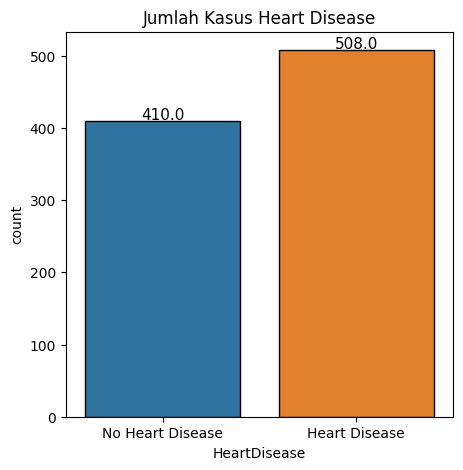

In [212]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='HeartDisease', data=df, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Jumlah Kasus Heart Disease')
plt.show()

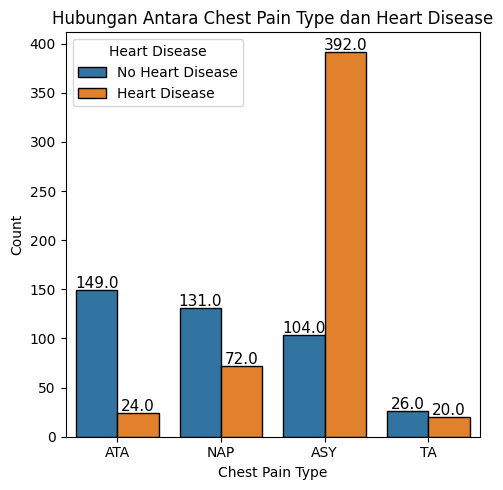

In [213]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
# Atur label sumbu x dan y
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Hubungan Antara Chest Pain Type dan Heart Disease')
# Tambahkan legenda
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

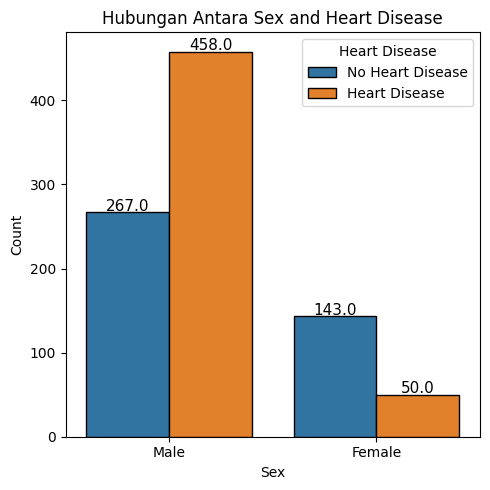

In [214]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Sex', hue='HeartDisease', data=df, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
# Atur label sumbu x dan y
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Hubungan Antara Sex and Heart Disease')
ax.set_xticklabels(['Male', 'Female'])
# Tambahkan legenda
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

# Analisis Korelasi

<Axes: >

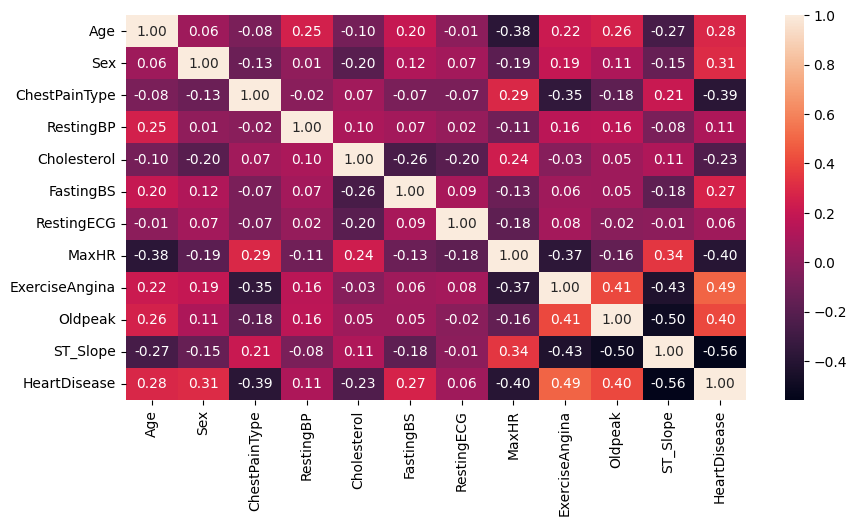

In [215]:
plt.figure(figsize=(10, 5))
corr = df1.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

In [216]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [217]:
def linear_regression(bebas, target, test_size, random_state):
    X = df1[bebas]
    y = df1[target]

    # Split dataset (train, test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Model regresi
    regr = LinearRegression()
    regr.fit(X_train, y_train)

    # Mencari nilai coef dan intercept
    intercept = regr.intercept_
    coef = regr.coef_

    # Prediksi
    pred = regr.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

    # Mengembalikan hasil
    result = {
        'X_train_shape': X_train.shape,
        'X_test_shape': X_test.shape,
        'y_train_shape': y_train.shape,
        'y_test_shape': y_test.shape,
        'intercept': intercept,
        'coef': coef,
        'rmse': rmse
    }

    return result

#### Model menggunakan 2 variable dengan corr > 0.4

In [218]:
model1_1 = linear_regression(['ExerciseAngina', 'Oldpeak'], 'HeartDisease', 0.2, 10)
model1_1

{'X_train_shape': (734, 2),
 'X_test_shape': (184, 2),
 'y_train_shape': (734,),
 'y_test_shape': (184,),
 'intercept': 0.29304340039374316,
 'coef': array([0.41775083, 0.10483787]),
 'rmse': 0.4318146403938142}

In [219]:
model1_2 = linear_regression(['ExerciseAngina', 'Oldpeak'], 'HeartDisease', 0.25, 10)
model1_2

{'X_train_shape': (688, 2),
 'X_test_shape': (230, 2),
 'y_train_shape': (688,),
 'y_test_shape': (230,),
 'intercept': 0.2931091254592244,
 'coef': array([0.40948861, 0.10693666]),
 'rmse': 0.4246334994752739}

In [220]:
model1_3 = linear_regression(['ExerciseAngina', 'Oldpeak'], 'HeartDisease', 0.3, 10)
model1_3

{'X_train_shape': (642, 2),
 'X_test_shape': (276, 2),
 'y_train_shape': (642,),
 'y_test_shape': (276,),
 'intercept': 0.2866197438484702,
 'coef': array([0.40896724, 0.11222835]),
 'rmse': 0.428351813659149}

#### Model menggunakan 5 variable dengan corr > 0.2

In [221]:
model2_1 = linear_regression(['Age', 'Sex', 'ExerciseAngina', 'Oldpeak', 'FastingBS'], 'HeartDisease', 0.2, 10)
model2_1

{'X_train_shape': (734, 5),
 'X_test_shape': (184, 5),
 'y_train_shape': (734,),
 'y_test_shape': (184,),
 'intercept': -0.20429559454547952,
 'coef': array([0.00534586, 0.25593808, 0.3535757 , 0.09110904, 0.21436222]),
 'rmse': 0.407457212558858}

In [222]:
model2_2 = linear_regression(['Age', 'Sex', 'ExerciseAngina', 'Oldpeak', 'FastingBS'], 'HeartDisease', 0.25, 20)
model2_2

{'X_train_shape': (688, 5),
 'X_test_shape': (230, 5),
 'y_train_shape': (688,),
 'y_test_shape': (230,),
 'intercept': -0.2607773935847605,
 'coef': array([0.00674722, 0.23483972, 0.31877188, 0.10534247, 0.20781576]),
 'rmse': 0.3869777028354409}

In [223]:
model2_3 = linear_regression(['Age', 'Sex', 'ExerciseAngina', 'Oldpeak', 'FastingBS'], 'HeartDisease', 0.3, 10)
model2_3

{'X_train_shape': (642, 5),
 'X_test_shape': (276, 5),
 'y_train_shape': (642,),
 'y_test_shape': (276,),
 'intercept': -0.18599862508808873,
 'coef': array([0.00496738, 0.25186861, 0.34512815, 0.09969412, 0.19962763]),
 'rmse': 0.3959763275240724}

#### Model menggunakan 3 variable dengan corr < 1

In [224]:
model3_1 = linear_regression(['ChestPainType', 'MaxHR', 'ST_Slope'], 'HeartDisease', 0.2, 10)
model3_1

{'X_train_shape': (734, 3),
 'X_test_shape': (184, 3),
 'y_train_shape': (734,),
 'y_test_shape': (184,),
 'intercept': 1.646963872891524,
 'coef': array([-0.13218361, -0.00362789, -0.36241104]),
 'rmse': 0.4040071345979528}

In [225]:
model3_2 = linear_regression(['ChestPainType', 'MaxHR', 'ST_Slope'], 'HeartDisease', 0.25, 10)
model3_2

{'X_train_shape': (688, 3),
 'X_test_shape': (230, 3),
 'y_train_shape': (688,),
 'y_test_shape': (230,),
 'intercept': 1.620894281052132,
 'coef': array([-0.13232556, -0.00341912, -0.36398401]),
 'rmse': 0.392679148152529}

In [226]:
model3_3 = linear_regression(['ChestPainType', 'MaxHR', 'ST_Slope'], 'HeartDisease', 0.3, 10)
model3_3

{'X_train_shape': (642, 3),
 'X_test_shape': (276, 3),
 'y_train_shape': (642,),
 'y_test_shape': (276,),
 'intercept': 1.58816680946574,
 'coef': array([-0.14430946, -0.00310468, -0.36552247]),
 'rmse': 0.4001837341125006}